Problem Statement:

Refer Telecom Churn Dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyze the performance of the model with suitable evaluation measures.


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.pie?

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn-Copy1.csv',header=0)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Data Description

customerID: Customer ID
genderCustomer: gender (female, male)
SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
PartnerWhether: the customer has a partner or not (Yes, No)
Dependents: Whether the customer has dependents or not (Yes, No)
tenure: Number of months the customer has stayed with the company
PhoneService: Whether the customer has a phone service or not (Yes, No)
MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract: The contract term of the customer (Month-to-month, One year, Two year)
PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
MonthlyCharges: The amount charged to the customer monthly
TotalCharges: The total amount charged to the customer
Churn: Whether the customer churned or not (Yes or No)

In [3]:
print(list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Inference:

Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper

We can also conclude that 75% of people have tenure.

Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

In [7]:
print(df.isnull().sum ())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'unique values')

customerID : 7043 unique values
gender : 2 unique values
SeniorCitizen : 2 unique values
Partner : 2 unique values
Dependents : 2 unique values
tenure : 73 unique values
PhoneService : 2 unique values
MultipleLines : 3 unique values
InternetService : 3 unique values
OnlineSecurity : 3 unique values
OnlineBackup : 3 unique values
DeviceProtection : 3 unique values
TechSupport : 3 unique values
StreamingTV : 3 unique values
StreamingMovies : 3 unique values
Contract : 3 unique values
PaperlessBilling : 2 unique values
PaymentMethod : 4 unique values
MonthlyCharges : 1585 unique values
TotalCharges : 6531 unique values
Churn : 2 unique values


## Changing DataType

In [9]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

#Total Charges will be related to Monthly Charges.
#We will impute Total charges multiplied by median of the ratio of Total charges to monthly charges

In [11]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

# EXploratory Data Analytics
Univariate Analysis 

Churn (Target Variable)

### Scatter Plot

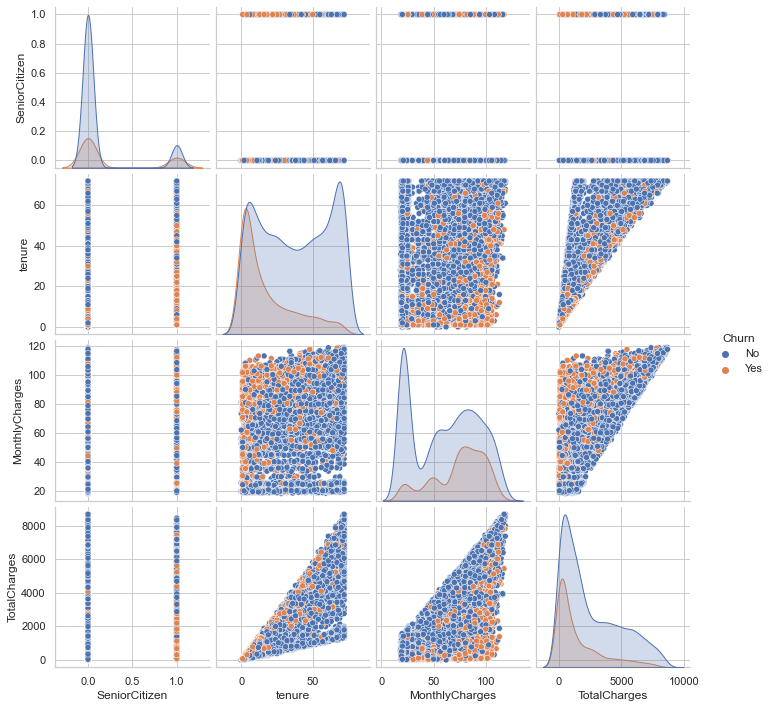

In [23]:
sns.pairplot(df, hue='Churn')
plt.show()

In [24]:
x = df['Churn'].value_counts()
x

No     5174
Yes    1869
Name: Churn, dtype: int64

## Churn Count Barplot

<AxesSubplot:>

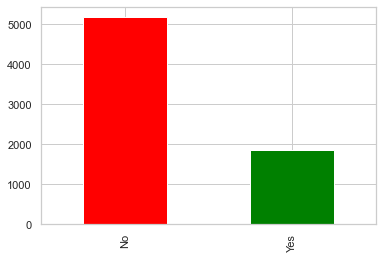

In [25]:
x.plot(kind = 'bar',color = ('red','green'))

From above bar plot we can clearly seen that out of 7043 customer, 5174 customer are not churned and 1869 customer are churned

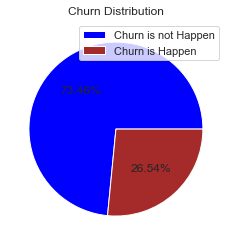

In [26]:
label=['Churn is not Happen','Churn is Happen']
plt.pie(x,autopct='%1.2f%%',colors=('blue','brown'))
plt.title('Churn Distribution')
plt.legend(label,loc=1)
plt.show()

Percentage of customer churned is 26.54% and customer not churned is 73.46%. 

### Barplot of Churn Vs  Contract

Text(0, 0.5, 'Frequency of churn')

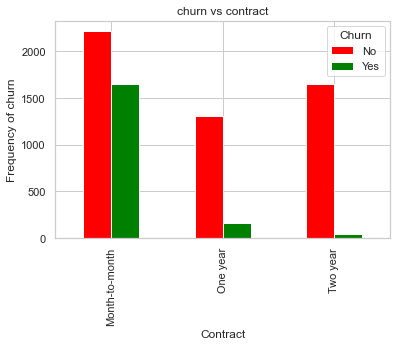

In [27]:
%matplotlib inline
pd.crosstab(df.Contract,df.Churn).plot(kind='bar',color=('red','green'))
plt.title('churn vs contract')
plt.xlabel('Contract')
plt.ylabel('Frequency of churn')

The churn rate of month to month contract is much higher than one year and two year contract

## Barplot of Churn vs Paperless Billing

Text(0, 0.5, 'Frequency of churn')

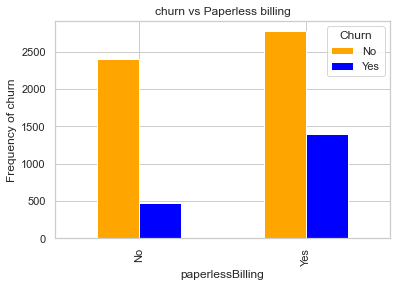

In [28]:
%matplotlib inline
pd.crosstab(df.PaperlessBilling,df.Churn).plot(kind='bar',color=('orange','blue'))
plt.title('churn vs Paperless billing')
plt.xlabel('paperlessBilling')
plt.ylabel('Frequency of churn')

As we can see that the customer who has Paperless billing the churn rate are more in that case.

## Barplot of Churn vs Phoneservice

Text(0, 0.5, 'frequency of churn ')

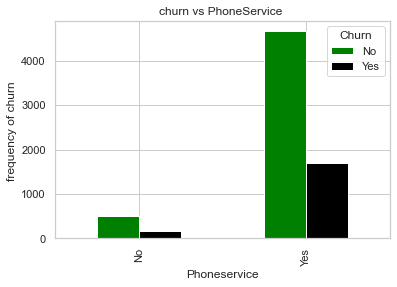

In [29]:
%matplotlib inline
pd.crosstab(df.PhoneService ,df.Churn).plot(kind='bar',color=('green','black'))
plt.title('churn vs PhoneService ')
plt.xlabel('Phoneservice')
plt.ylabel('frequency of churn ')

The churn rate in customer having Phoneservice is comapatively high than customer with no phonservice

# Phone Service


In [30]:
label=['Churn is not Happen','Churn is Happen']
Phoneservice_yes=df[df['PhoneService']=='Yes']['Churn'].value_counts()
Phoneservice_No=df[df['PhoneService']=='No']['Churn'].value_counts()

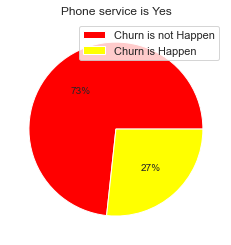

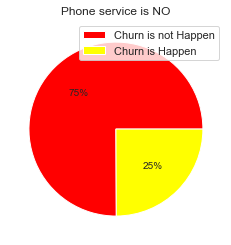

In [31]:
plt.pie(Phoneservice_yes, colors =('red','yellow'), autopct='%.0f%%')
plt.title('Phone service is Yes')
plt.legend(label,loc=1)
plt.show()
plt.pie(Phoneservice_No,  colors =('red','yellow'), autopct='%.0f%%')
plt.title('Phone service is NO')
plt.legend(label,loc=1)
plt.show()

If the customer has phoneservice then the churn rate is 27 percent If the customer don't have phoneservice then the churn rate is 25 percent The total number of customer having phoneservice is much larger than the customer with no phoneservice

## Barplot of InternetService vs Churn

Text(0, 0.5, 'frequency of churn ')

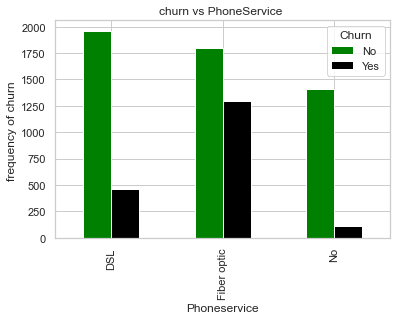

In [32]:
%matplotlib inline
pd.crosstab(df.InternetService ,df.Churn).plot(kind='bar',color=('green','black'))
plt.title('churn vs PhoneService ')
plt.xlabel('Phoneservice')
plt.ylabel('frequency of churn ')

In [33]:
label=['Churn is not Happen','Churn is Happen']
Internet_DSL=df[df['InternetService']=='DSL']['Churn'].value_counts()
Internet_Fiber_optic=df[df['InternetService']=='Fiber optic']['Churn'].value_counts()
Internet_No=df[df['InternetService']=='No']['Churn'].value_counts()
myexplode=[0.1,0]
myexplod=[0,0.1]

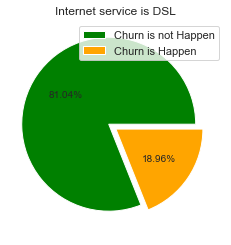

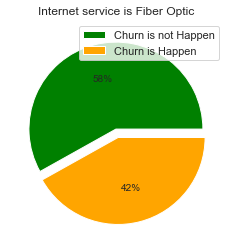

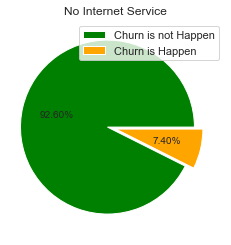

In [34]:
plt.pie(Internet_DSL,colors=('green','orange'),autopct='%1.2f%%',explode=myexplode)
plt.title('Internet service is DSL')
plt.legend(label,loc=1)
plt.show()

plt.pie(Internet_Fiber_optic,colors=('green','orange'),autopct='%.0f%%',explode=myexplod)
plt.title('Internet service is Fiber Optic')
plt.legend(label,loc=1)
plt.show()

plt.pie(Internet_No,colors=('green','orange'),autopct='%1.2f%%',explode=myexplode)
plt.title('No Internet Service')
plt.legend(label,loc=1)
plt.show()

In the InternetService there are three categories (DSL, Fiber Optic,No Internet Service) in DSL there is 18.96 percent rate of churn and In fiber optic 42 percent and In No Internet Service there is 7.40 percent rate of churn

## Barplot of Churn vs SeniorCitizen

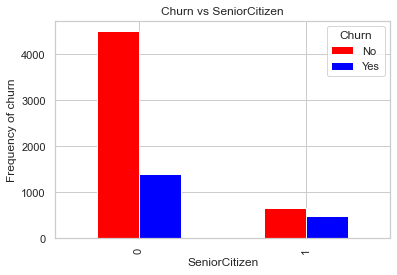

In [35]:
%matplotlib inline
pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind='bar',color=('red','blue'))
plt.title('Churn vs SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency of churn')
plt.show()


## Piechart of Churn vs Seniorcitizen

In [36]:
seniorcitizen_yes=df[df['SeniorCitizen']==1]['Churn'].value_counts()
print(seniorcitizen_yes)
seniorcitizen_no=df[df['SeniorCitizen']==0]['Churn'].value_counts()
print(seniorcitizen_no)
label=['Churn is not Happen','Churn is Happen']
myexplode=[0,0.1,]

No     666
Yes    476
Name: Churn, dtype: int64
No     4508
Yes    1393
Name: Churn, dtype: int64


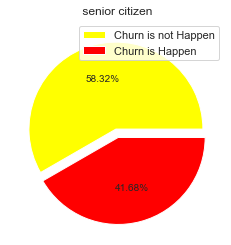

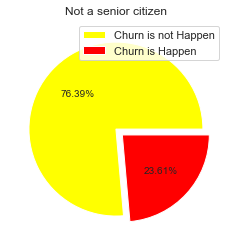

In [37]:
%matplotlib inline
plt.pie(seniorcitizen_yes,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplod)
plt.title(' senior citizen')
plt.legend(label,loc=1)
plt.show()
%matplotlib inline
plt.pie(seniorcitizen_no,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplode)
plt.title('Not a senior citizen')
plt.legend(label,loc=1)
plt.show()

Total no of customer who is seniorcitizen is less than customer is not seniorcitizen the churn rate in seniorcitizen customer is more than other customer

## Histogram of Totalcharges

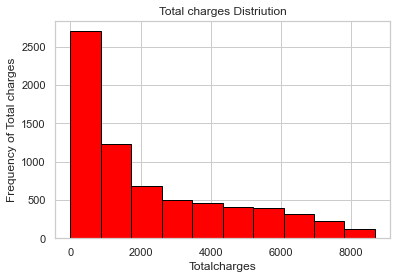

In [38]:
df['TotalCharges'].plot(kind='hist',edgecolor='black',color='red')
plt.title('Total charges Distriution')
plt.xlabel('Totalcharges')
plt.ylabel('Frequency of Total charges')
plt.show()

## Piechart of dependents

The distribution of Totalcharges is Positively Skewed . most of the observation are between 0 to 2000

In [39]:
dependents_yes=df[df['Dependents']=='Yes']['Churn'].value_counts()
print(dependents_yes)
dependents_no=df[df['Dependents']=='No']['Churn'].value_counts()
print(dependents_no)
label=['Churn is not Happen','Churn is Happen']
myexplode=[0,0.1,]

No     1784
Yes     326
Name: Churn, dtype: int64
No     3390
Yes    1543
Name: Churn, dtype: int64


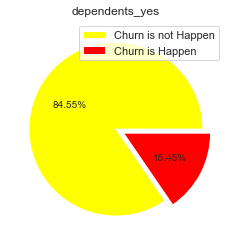

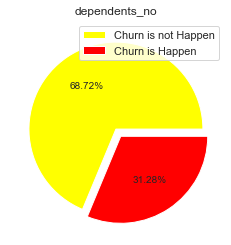

In [40]:
%matplotlib inline
plt.pie(dependents_yes,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplod)
plt.title('dependents_yes')
plt.legend(label,loc=1)
plt.show()
%matplotlib inline
plt.pie(dependents_no,colors=('yellow','red'),autopct='%1.2f%%',explode=myexplode)
plt.title('dependents_no')
plt.legend(label,loc=1)
plt.show()

Churn rate of customer have dependents is less than customer dont having dependents

# Contract

In [12]:
df.groupby('Contract').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Contract,,,,
Month-to-month,0.208258,18.036645,66.398490,1369.254581
One year,0.128988,42.044807,65.048608,3032.622878
Two year,0.085546,56.735103,60.770413,3706.934336


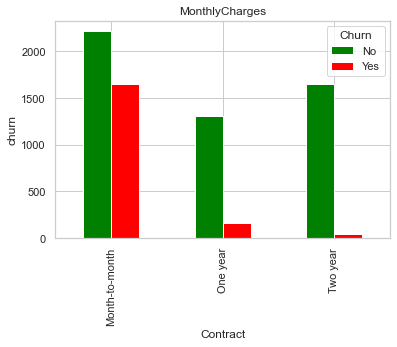

In [42]:
%matplotlib inline
pd.crosstab(df.Contract,df.Churn).plot(kind='bar',color = ('green','red'))
plt.title('MonthlyCharges')
plt.xlabel('Contract')
plt.ylabel('churn')
plt.savefig('Contract')

#Customers with One Year and Two year contract tends to Churn a lot lesser than month to month contract.

# Paperless Billing

<Figure size 1080x360 with 0 Axes>

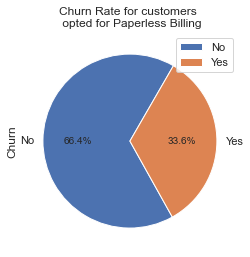

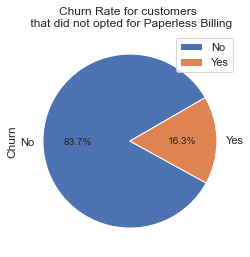

In [43]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(df[df['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(df[df['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

Churn Rate is higher for the customers who opted for paperless billing

# Payment Method

In [44]:
df.PaymentMethod.describe()

count                 7043
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

In [45]:
df.groupby('PaymentMethod').mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
PaymentMethod,,,,
Bank transfer (automatic),0.150907,43.656736,67.192649,3075.310816
Credit card (automatic),0.145204,43.269382,66.512385,3069.378022
Electronic check,0.251163,25.174630,76.255814,2090.868182
Mailed check,0.058313,21.830025,43.917060,1049.250744


<Figure size 1080x720 with 0 Axes>

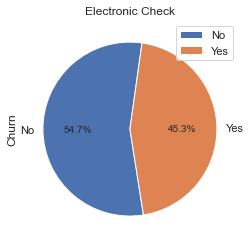

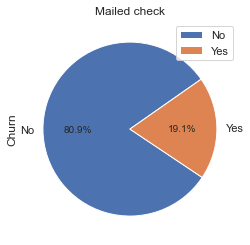

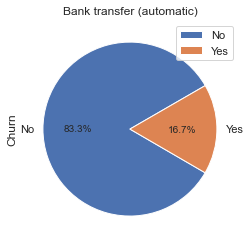

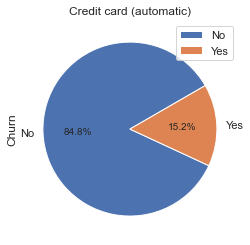

In [46]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(df[df['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(df[df['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(df[df['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(df[df['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

customers with Electronic Check tends to churn more than other payment methods

### correlation matrices

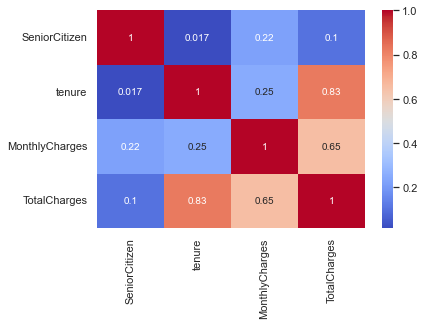

In [47]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

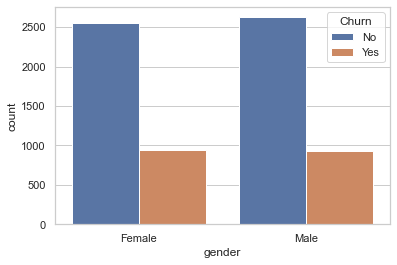

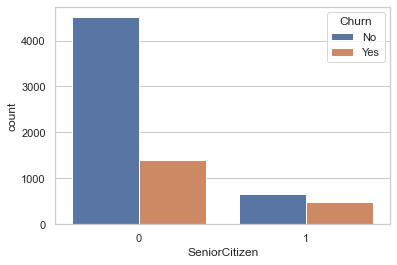

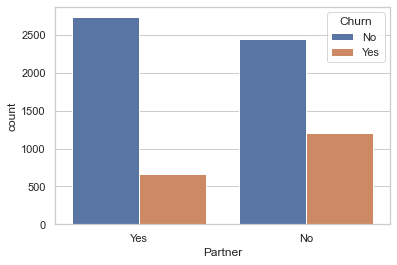

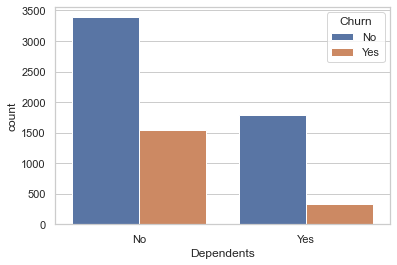

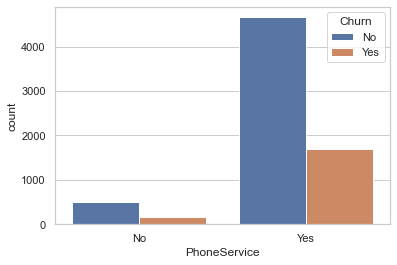

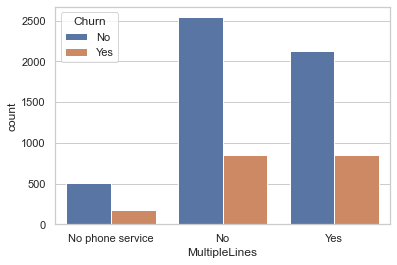

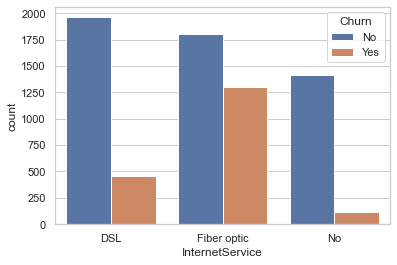

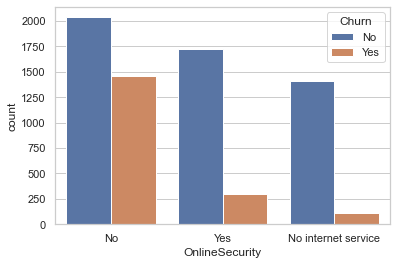

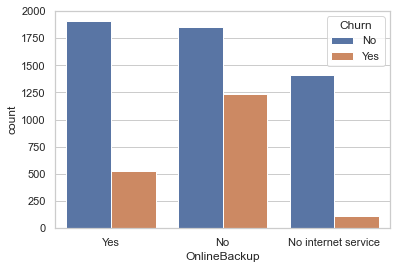

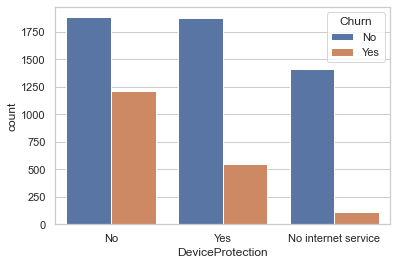

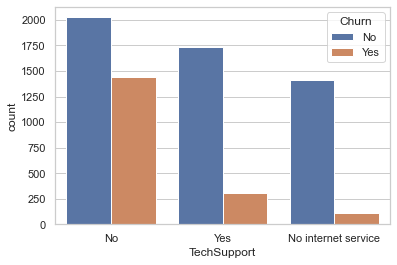

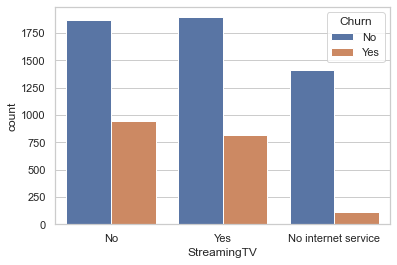

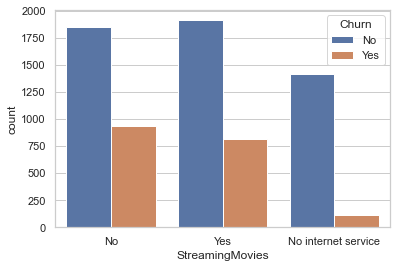

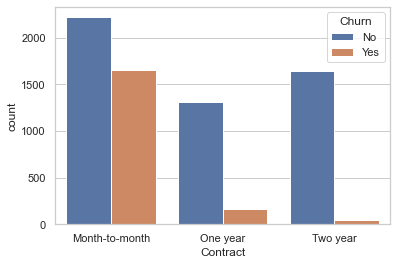

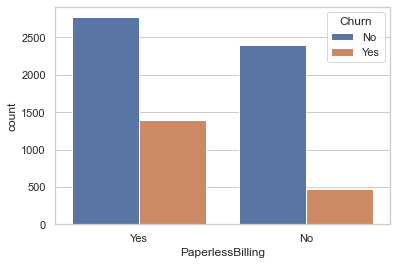

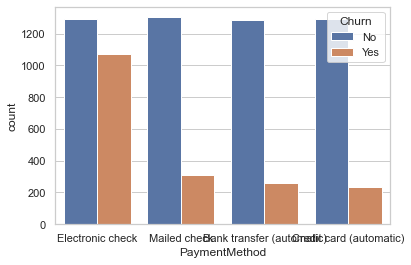

In [48]:
telco_data = df.copy()
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#Customers with no dependents tends to churn more.

#Multiple lines of internet connectivity doesn't effect churn that much.

#Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

#Customers opted for Online Security churn less than who have not opted.

#Customers opted for Online Backup churn less than who have not opted.

#Customers opted for Device Potection churn less than who have not opted.

#Customers opted for Tech Support churn less than who have not opted.

#Streaming TV doesn't make such impact on churning.

#Streaming Movies doesn't make such impact on churning.

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Model Building
## One Hot Encoding
Data Preparation 

 Here as we know we can’t have character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No = 0

In [14]:
df.Churn.replace({'Yes':1 , 'No':0},inplace=True)

For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
data=pd.get_dummies(data=df,columns=['gender','Partner','Dependents','OnlineBackup','StreamingMovies','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod'],drop_first=True)
data

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,0,...,0,0,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7043 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   OnlineBackup_No internet service       7043 non-null   uint8  
 10  OnlineBackup_Yes                       7043 non-null   uint8  
 11  Stre

In [53]:
data = data.drop(columns = ['customerID'])

In [16]:
data

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,OnlineBackup_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,0,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,0,0,1,1,0,...,0,0,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


ValueError: num must be an integer with 1 <= num <= 8, not 9

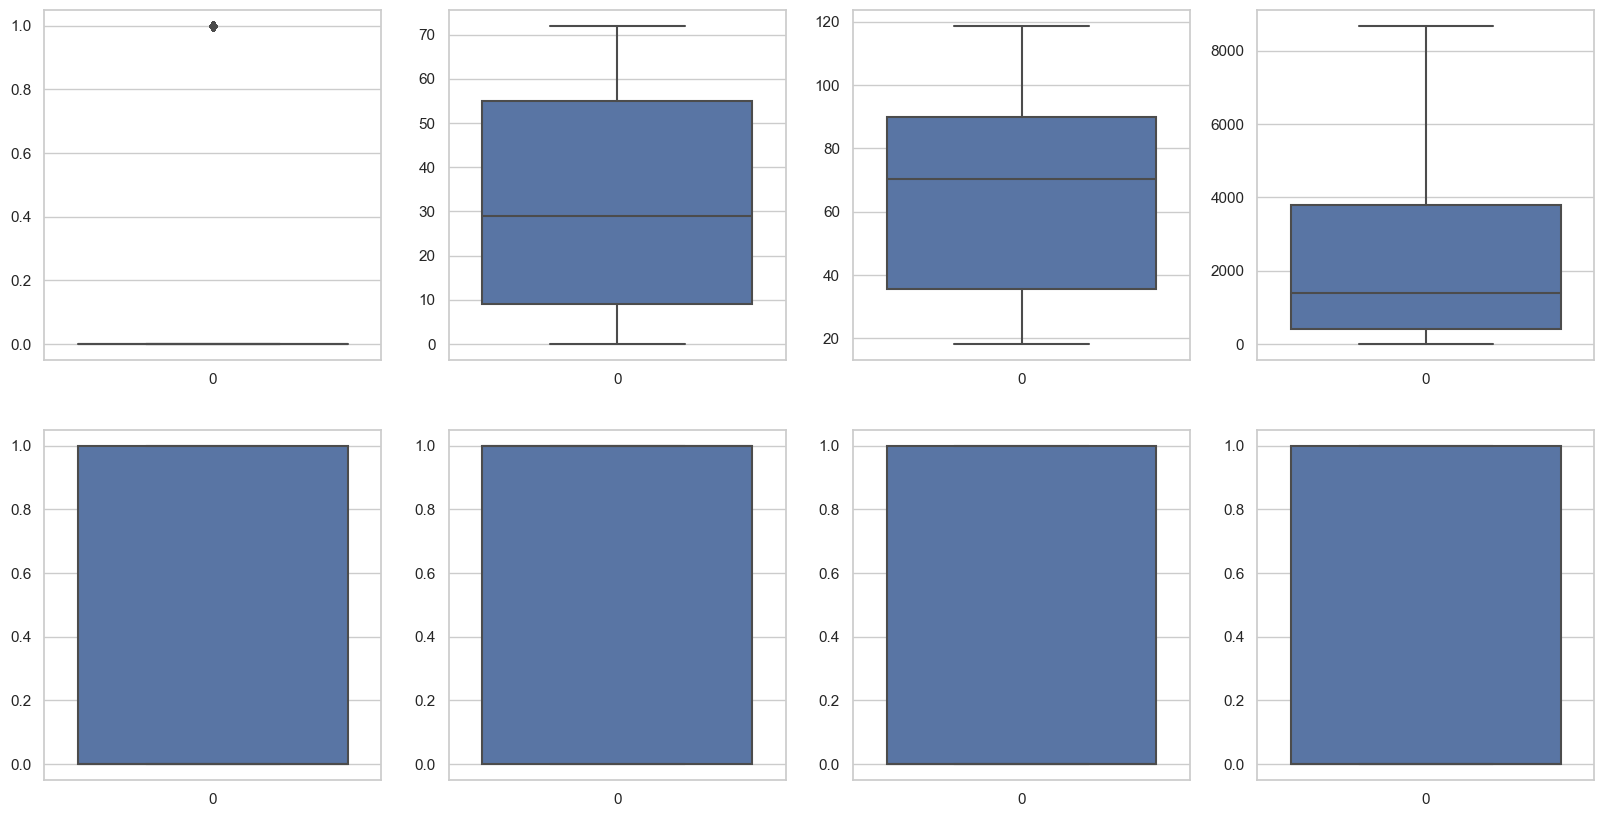

In [17]:
plt.figure(figsize=(20, 10))
for i in range(1, 32):
    plt.subplot(2, 4, i)
    sns.boxplot(data.iloc[:, i])

In [55]:
data.corr()['Churn']

SeniorCitizen                            0.150889
tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.198324
Churn                                    1.000000
gender_Male                             -0.008612
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
StreamingMovies_No internet service     -0.227890
StreamingMovies_Yes                      0.061382
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
DeviceProtection_No internet service    -0.227890


In [56]:
X = data.drop(columns = 'Churn')
Y = data['Churn']   # Target Variable

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [58]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state =0)

In [59]:
model=DecisionTreeClassifier(max_depth=5)

In [60]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [61]:
prediction=model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1560
           1       0.60      0.55      0.57       553

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.78      0.79      0.78      2113



In [70]:
confusion_matrix(prediction,Y_test)

array([[1362,  250],
       [ 198,  303]], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(prediction,Y_test)

0.7879791765262659

In [66]:
model.score(X_train,Y_train)

0.8022312373225152

In [1]:
model.score(X_test,Y_test)

NameError: name 'model' is not defined

## Decision Tree

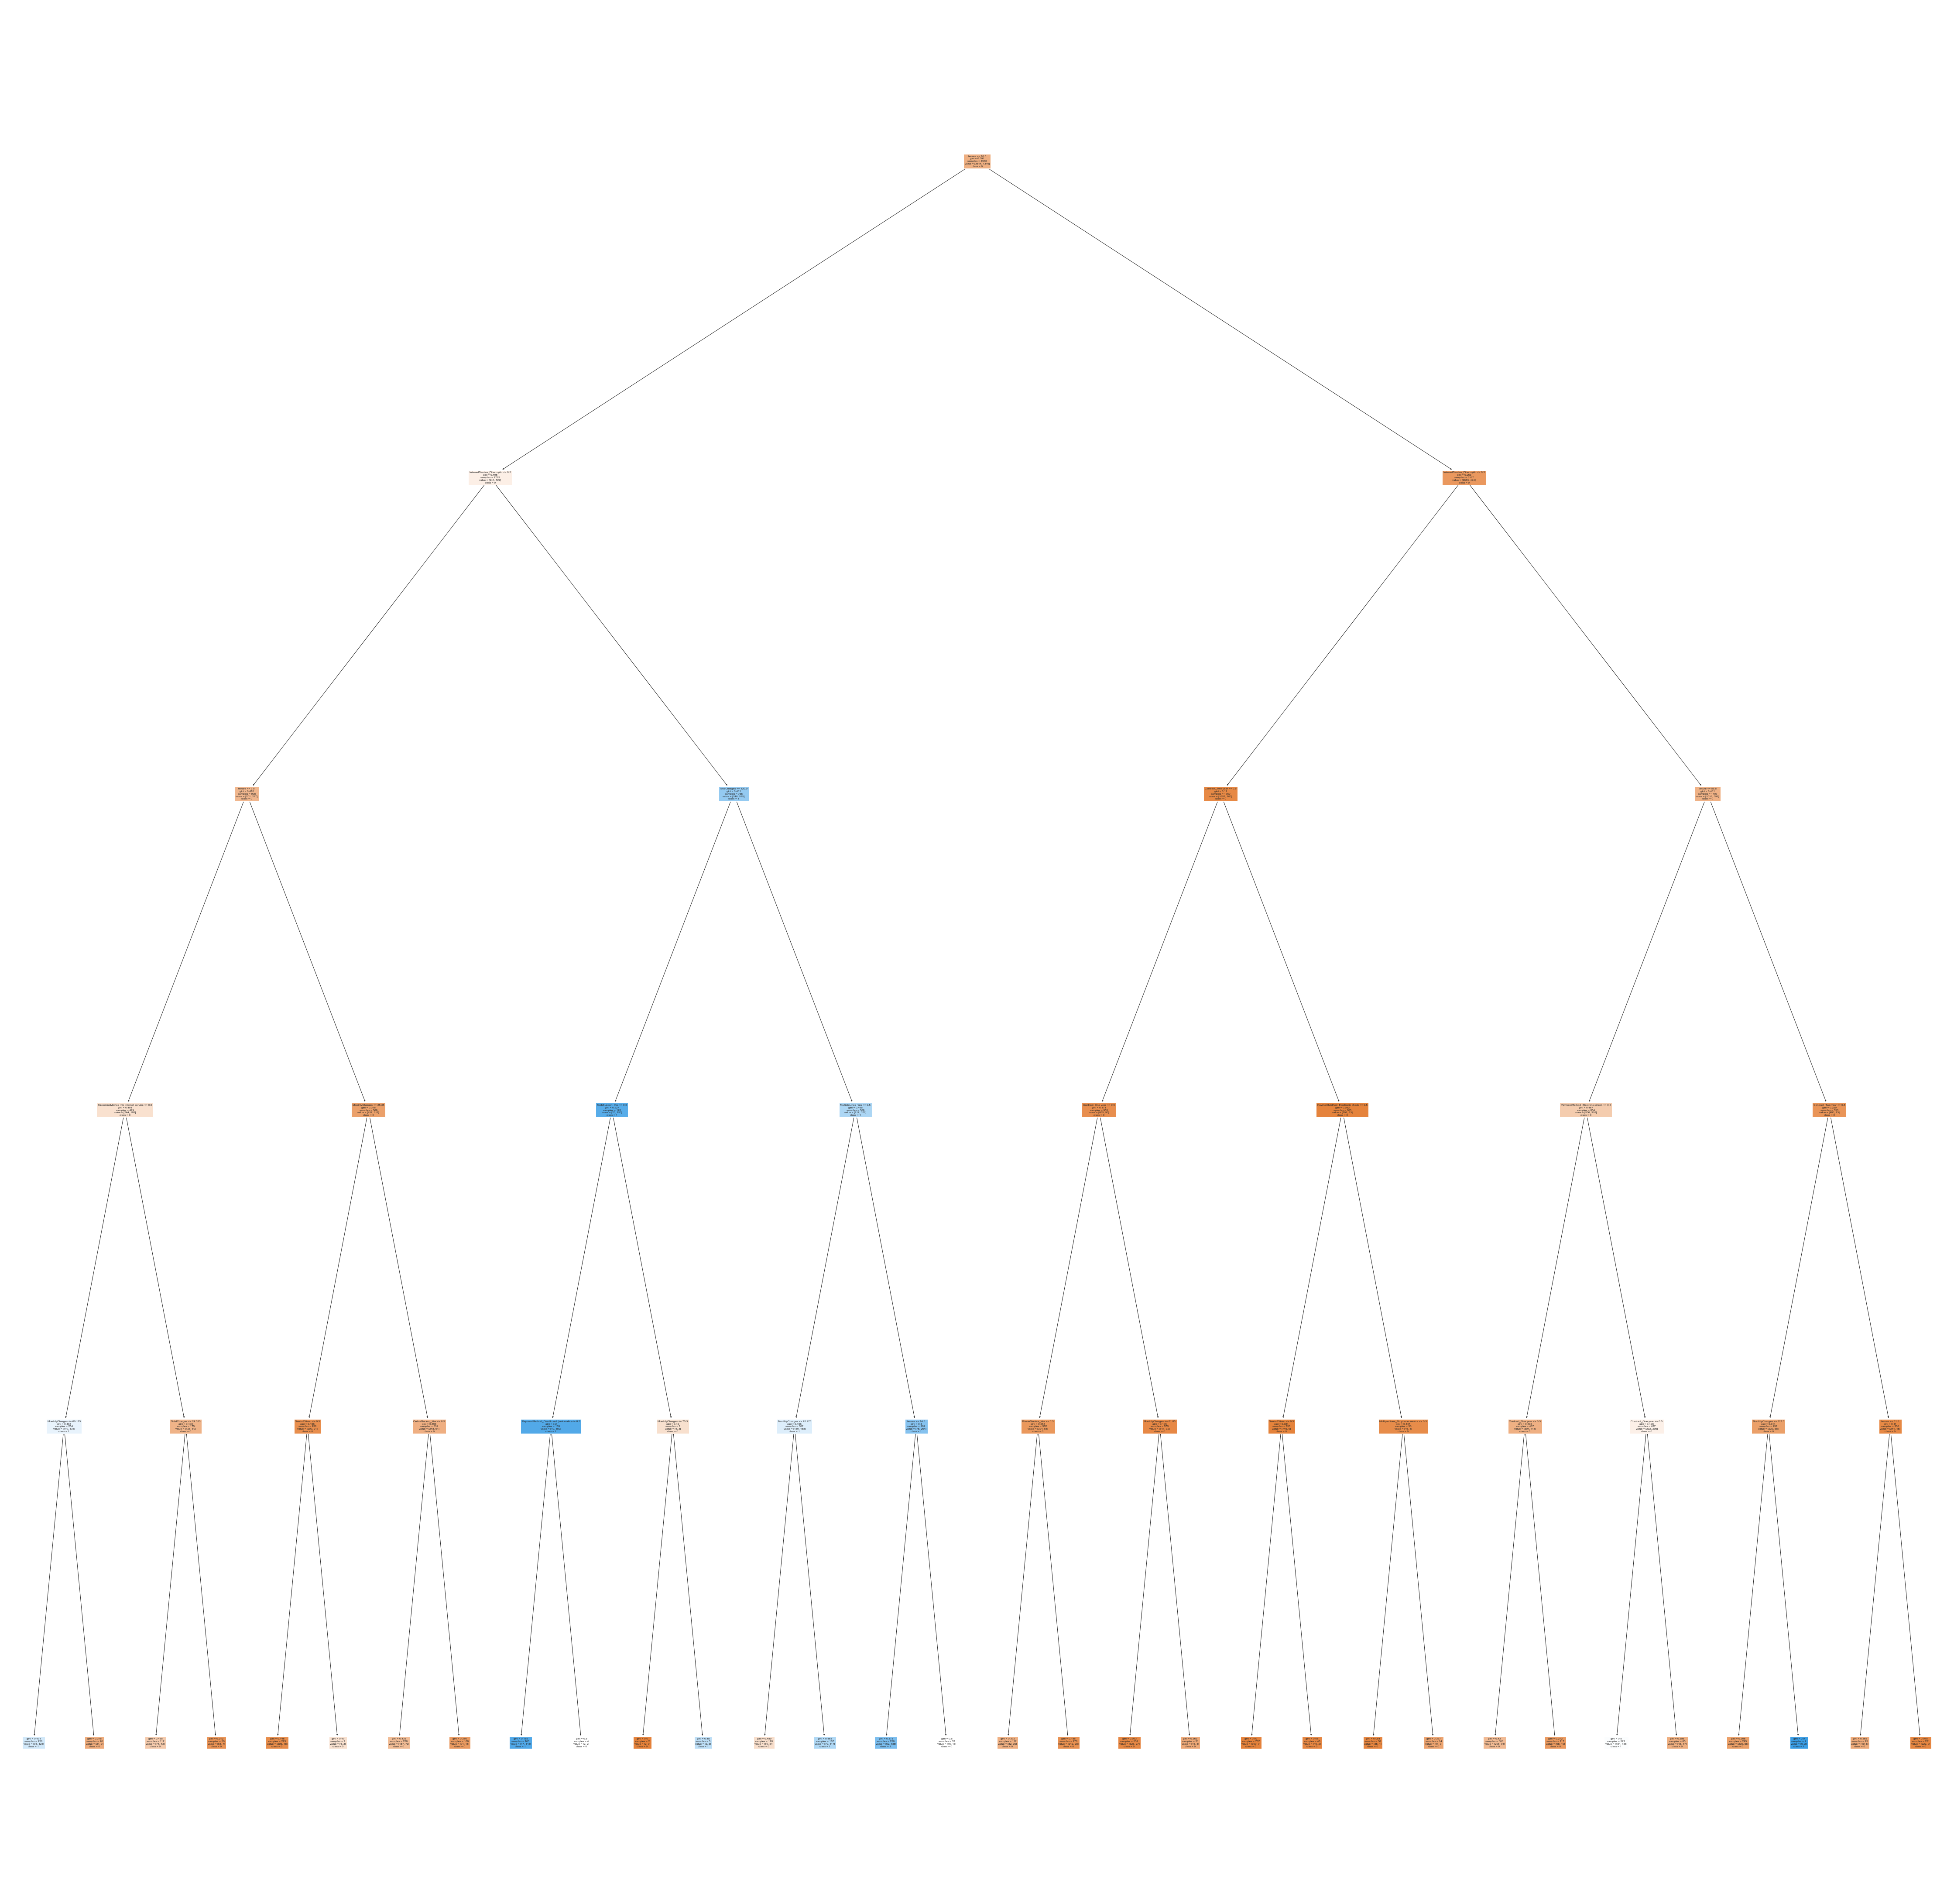

In [68]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,80))
plot_tree(model,filled=True,feature_names=X_train.columns,class_names=['0','1']);
#plt.savefig('tree.png',dpi=400,bbox_inches='tight')
plt.show()

